In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

for the linear function $\hat{y}= a*x + b$ , let $a=2, b= 10$ for this model.  
for the random perturbations, which is $ y = \hat{y} + n$, Gaussian Noise is used for $n \sim \mathcal{N}(0, \sigma^2)$

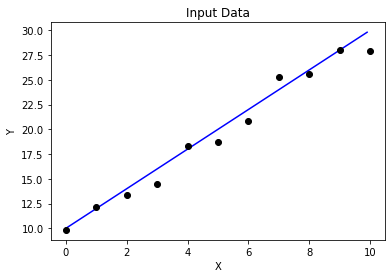

In [2]:
x = np.arange(0,10,0.1)
y = 2*x + 10 # a= 2, b = 10
plt.title('Input Data')
plt.plot(x, y, c= 'b')
# a straight line that is the graph of a linear function (in blue color)

m = np.arange(0,11,1) # m = 11
noise = []

for i in m:
    noise.append(2*i +10 + np.random.normal(0,1)) #gaussian noise, changed from random.uniform to np.random.normal 

plt.plot(m, noise, 'ro', c = 'k')
#a set of points that have random perturbations with respect to the straight line (in black color)

plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [3]:
#defining functions
def Linear_Model(theta0, theta1, x): #Linear function
    return theta0 + theta1 * x


def Objective_Function(m, theta0, theta1):#object function (loss function)
    result = 0
    for i in m:
        result += (Linear_Model(theta0, theta1, i) - (2*i +10))**2
    result /= 2* len(m)
    return result


def Gradient_Descent(m, lr, theta0, theta1): # derivative of loss funciton 
    temp = 0
    for i in m:
        temp += (Linear_Model(theta0, theta1, i) - (2*i +10))
    new_theta0 = theta0 - lr * temp / len(m)
    
    temp = 0
    for i in m:
        temp += (Linear_Model(theta0, theta1, i) - (2*i +10))*i
    new_theta1 = theta1 - lr * temp / len(m)
    
    theta0 = new_theta0
    theta1 = new_theta1 #theta0 and theta1 should be updated simultaneously, after calculation
    
    return theta0, theta1

In [4]:
m = np.arange(0,11,1) # m = 11, 11 pair points for random perturbations
lr = 0.01 # let learning rate 0.01
theta0 = random.uniform(1,3) #randomly initializing theta0, theta1 (parameters)
theta1 = random.uniform(8,12)

In [5]:
of_val = [] #object function value
theta = [] #contains theta values during each step
for i in range(1000): # changing theta values using gradient descent for 1000 iter
    of_val.append(Objective_Function(m, theta0, theta1))
    theta0, theta1 = Gradient_Descent(m,lr,theta0,theta1)
    theta.append((theta0, theta1))

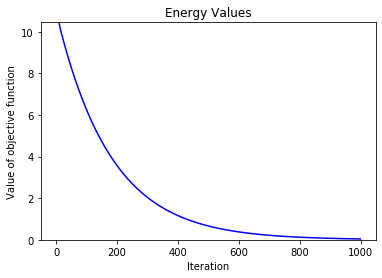

In [6]:
x = np.arange(0,1000,1)
y= []
for i in x:
    y.append(of_val[i])
plt.title('Energy Values')
plt.ylim(0,y[10])
plt.plot(x, y, c= 'b')
plt.ylabel('Value of objective function')
plt.xlabel('Iteration')
plt.show()

After 1000 iterations of parameters update,  
we can see that the energy values(object function value) converges to almost 0.  
: -> Good, because we want to minimize it, and also find theta0, theta1 that minimizes it.

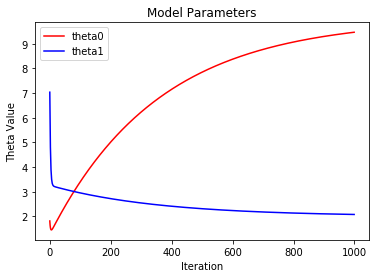

In [7]:
x = np.arange(0,1000,1)
y= []
for i in x:
    y.append(theta[i][0])
plt.title('Model Parameters')
plt.plot(x, y, c= 'r') #theta0
plt.ylabel('Theta Value')
plt.xlabel('Iteration')

x = np.arange(0,1000,1)
y= []
for i in x:
    y.append(theta[i][1])
plt.plot(x, y, c= 'b') #theta1
plt.legend(['theta0','theta1'])
plt.show()

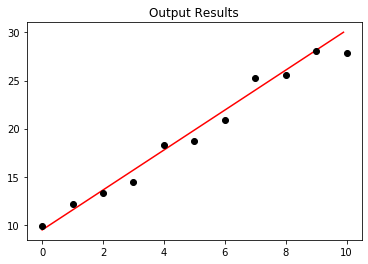

In [8]:
x = np.arange(0,10,0.1)
y = []
for i in x:
    y.append(theta0 + theta1 * i)
plt.title('Output Results')
plt.plot(x, y, c= 'r')

plt.plot(m, noise, 'ro', c = 'k')
plt.show()

$h_\theta(x) = \theta_0 + \theta_1 x$,  
if the regression were done sucessfully, theta0 should be close to 10 and theta1 should be close to 2

In [9]:
print(theta0, theta1)

9.46937042654237 2.0764154498094785
